In [15]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
mu = []
std = []
def norm(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:,i]))

In [17]:
#Processing the data
df = pd.read_excel('Concrete_Data.xls')
data_o = np.array(df,dtype = float)
norm(data_o)
data=np.hstack((np.ones((data_o.shape[0],1)),data_o))
x = data[:,[0,8]]
y = data[:,-1]

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=900/1030)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(900, 2)
(130, 2)
(900,)
(130,)


In [19]:
def h(x,theta):
    return np.matmul(x,theta)

In [20]:
def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/y.shape[0]

In [21]:
def cost_function_test(theta):
    return ((h(X_test, theta)-Y_test).T@(h(X_test, theta)-Y_test))/Y_test.shape[0]

In [22]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=20):
    m = x.shape[0]
    J_all = []
    
    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (2/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

In [23]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

Cost:  [[250.49705574]]
Parameters:  [[35.38526015]
 [ 5.35857511]]


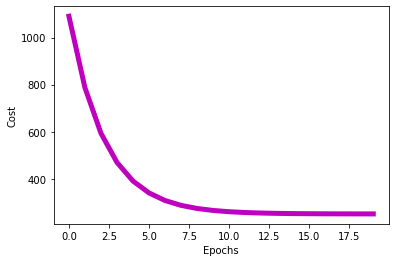

In [24]:
start = time.time()
y = np.reshape(Y_train,(900,1))
x = X_train
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 20
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)
end = time.time()
print(end-start)

In [25]:
theta

array([[35.38526015],
       [ 5.35857511]])

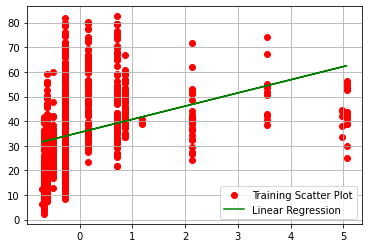

In [26]:
#Plot the scatterplot and the regression line
plt.scatter(x[:,1],y, color = 'red', label = 'Training Scatter Plot')
plt.plot(x[:,1],h(x,theta),color = 'green',label = 'Linear Regression')
plt.grid()
plt.legend()

In [27]:
#R-squared value of training
1-J/np.var(y)

array([[0.10503206]])

In [28]:
#R-square value of testing
Y_test = np.reshape(Y_test,(130,1))
np.var(Y_test)
J = cost_function_test(theta)
1-J/np.var(Y_test)

array([[0.1242636]])